# NEW STUFF

# Setup

In [1]:
    # 1 Data manipulation
import numpy as np
from bs4 import BeautifulSoup as bs
import pandas as pd
import pandas_datareader
from pandas_datareader import data as wb
    # 7 Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

    # 11 Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
    # 14 More Visualizations
import chart_studio.plotly as py
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)
    # 21 Cufflinks binds Plotly directly to pandas dataframes.
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')
 
    # 26 IMPORT API FUNCTIONS
import quandl
import yfinance as yf
from yahoofinancials import YahooFinancials
import requests
import alpha_vantage
from alpha_vantage.timeseries import TimeSeries
#import iex
import iexfinance
from iexfinance.stocks import Stock
from iexfinance.stocks import get_historical_data
from iexfinance.stocks import get_historical_intraday
from iexfinance.refdata import get_symbols
from iexfinance.data_apis import get_data_points
from iexfinance.data_apis import get_time_series
from iexfinance.altdata import get_social_sentiment
from iexfinance.altdata import get_ceo_compensation

    # 44 MISC LIB IMPORTS
import locale
from datetime import date, datetime
from nsepy import get_history
import os
import time
import csv
import json
from patsy import dmatrices

    # 54

C:\Users\gordo\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Local_Library_Import
We import all the required local libraries libraries

In [2]:
# Include local library paths
import sys

    # uncomment and fill to import local libraries
    
# sys.path.append('path/to/local/lib') 
# Import local libraries

# Time Series Evaluation & Forecasting

In [3]:
stock=wb.get_data_yahoo('TSLA',start='2018-01-01')
stock = stock.drop(['Adj Close','Volume','Open','Low','High'], axis=1)
#stock = stock.drop('Adj Close', axis=1)
stock

,Close
Date,
2018-01-02,320.529999
2018-01-03,317.250000
2018-01-04,314.619995
2018-01-05,316.579987
2018-01-08,336.410004
...,...
2020-03-02,743.619995
2020-03-03,745.510010
2020-03-04,749.500000


In [4]:
    # moving average

stock['5.day']=stock['Close'].rolling(5).mean().shift()
stock['MAD.5']=np.abs(stock['Close']-stock['5.day'])


stock['10.day']=stock['Close'].rolling(10).mean().shift()
stock['MAD.10']=np.abs(stock['Close']-stock['10.day'])


stock['30.day']=stock['Close'].rolling(30).mean().shift()
stock['MAD.30']=np.abs(stock['Close']-stock['30.day'])


stock['90.day']=stock['Close'].rolling(90).mean().shift()
stock['MAD.90']=np.abs(stock['Close']-stock['90.day'])


stock.tail()

,Close,5.day,MAD.5,10.day,MAD.10,30.day,MAD.30,90.day,MAD.90
Date,,,,,,,,,
2020-03-02,743.619995,751.897986,8.277991,813.574994,69.954999,714.218335,29.401660,484.626112,258.993883
2020-03-03,745.510010,733.863989,11.646021,807.933990,62.423981,721.889335,23.620675,490.071890,255.438120
2020-03-04,749.500000,722.983997,26.516003,796.644989,47.144989,729.723002,19.776998,495.515557,253.984443
2020-03-05,724.539978,717.123999,7.415979,779.852991,55.313013,736.466335,11.926357,501.013557,223.526421
2020-03-06,703.479980,726.231995,22.752014,762.365991,58.886011,741.632334,38.152354,505.734223,197.745757


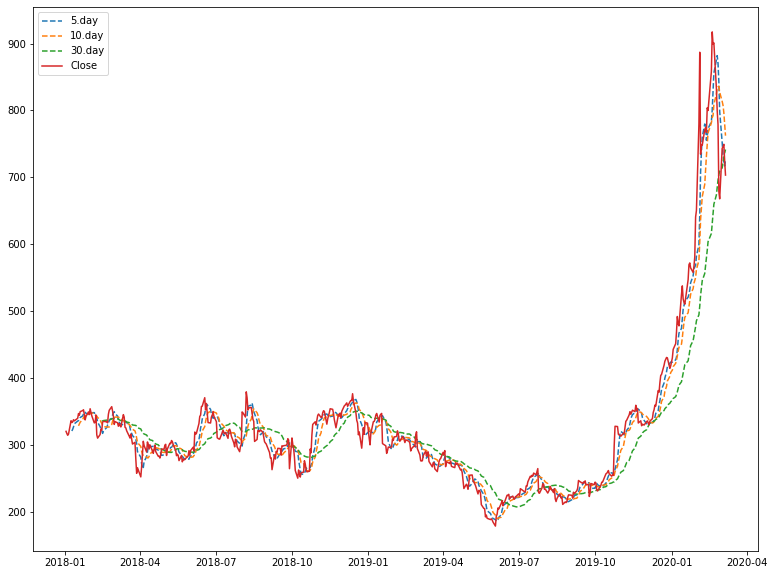

In [5]:
plt.figure(figsize=(13,10))


plt.plot(stock['5.day'],'--', label='5.day')

plt.plot(stock['10.day'],'--', label='10.day')

plt.plot(stock['30.day'],'--', label='30.day')

#plt.plot(stock['90.day'], label='90.day')

plt.plot(stock['Close'], label='Close')



plt.legend()
plt.show()

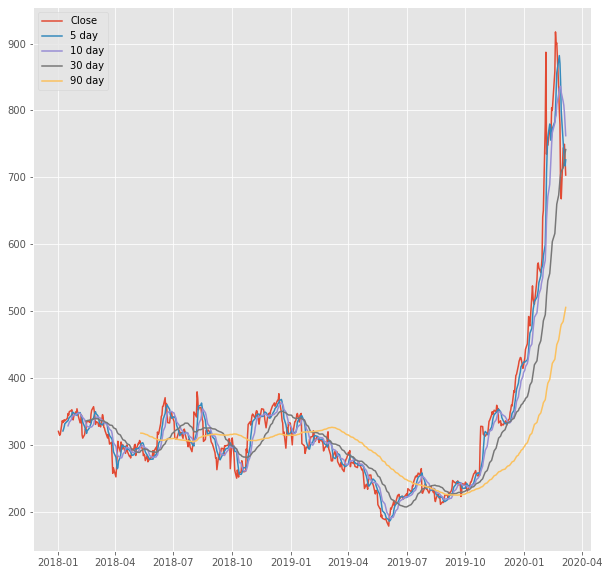

In [6]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10,10))
    plt.plot(stock.Close,label='Close')
    plt.plot(stock['5.day'], label='5 day')
    plt.plot(stock['10.day'], label='10 day')
    plt.plot(stock['30.day'], label='30 day')
    plt.plot(stock['90.day'], label='90 day')
    
    plt.legend()
    plt.show()

## Forecasting with Single Exponential Smoothing

In [7]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as ses

In [8]:
# PULL HISTORICAL DATA DAILY

stock=pdr.get_data_yahoo('TSLA',start='2015-01-01')
stock.drop(['Adj Close','Volume'], axis=1, inplace=True)

stock

,High,Low,Open,Close
Date,,,,
2015-01-02,223.250000,213.259995,222.869995,219.309998
2015-01-05,216.500000,207.160004,214.550003,210.089996
2015-01-06,214.199997,204.210007,210.059998,211.279999
2015-01-07,214.779999,209.779999,213.350006,210.949997
2015-01-08,213.800003,210.009995,212.809998,210.619995
...,...,...,...,...
2020-03-02,743.690002,686.669983,711.260010,743.619995
2020-03-03,806.979980,716.109985,805.000000,745.510010
2020-03-04,766.520020,724.729980,763.960022,749.500000


In [9]:
# RESAMPLE IN WEEKLY DATA

stock_W=pd.DataFrame(stock.resample('W').last())
stock_W

,High,Low,Open,Close
Date,,,,
2015-01-04,223.250000,213.259995,222.869995,219.309998
2015-01-11,209.979996,204.960007,208.919998,206.660004
2015-01-18,194.490005,189.649994,190.699997,193.070007
2015-01-25,203.500000,198.330002,200.289993,201.289993
2015-02-01,207.470001,203.000000,203.960007,203.600006
...,...,...,...,...
2020-02-09,769.750000,730.000000,730.549988,748.070007
2020-02-16,812.969971,785.500000,787.219971,800.030029
2020-02-23,913.059998,880.450012,906.979980,901.000000


In [10]:
# RESAMPLE IN MONTHLY DATA

stock_M=pd.DataFrame(stock.resample('M').last())
stock_M

,High,Low,Open,Close
Date,,,,
2015-01-31,207.470001,203.000000,203.960007,203.600006
2015-02-28,208.550003,202.800003,206.899994,203.339996
2015-03-31,193.759995,188.410004,193.529999,188.770004
2015-04-30,232.889999,225.169998,230.389999,226.050003
2015-05-31,252.869995,249.429993,251.000000,250.800003
...,...,...,...,...
2019-11-30,331.260010,327.500000,331.109985,329.940002
2019-12-31,421.290009,402.079987,405.000000,418.329987
2020-01-31,653.000000,632.520020,640.000000,650.570007


## ANALYSIS

In [11]:
# MODEL WEEKLY DATASET

model = ses(stock_W['Close'])
model_fit_W=model.fit()
model_fit_W.predict()

C:\Users\gordo\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning:

invalid value encountered in greater_equal



2020-03-15    702.275071
Freq: W-SUN, dtype: float64

In [12]:
# MODEL MONTHLY DATASET

model = ses(stock_M['Close'])
model_fit_M=model.fit()
model_fit_M.predict()

2020-04-30    703.47998
Freq: M, dtype: float64

In [13]:
# WEEKLY

y_hat_W=model_fit_W.fittedvalues
print(y_hat_W.tail())


# MONTHLY

y_hat_M=model_fit_M.fittedvalues
print(y_hat_M.tail())

Date
2020-02-09    646.142738
2020-02-16    742.973977
2020-02-23    797.177413
2020-03-01    895.809210
2020-03-08    679.380207
Freq: W-SUN, dtype: float64
Date
2019-11-30    314.920013
2019-12-31    329.940002
2020-01-31    418.329987
2020-02-29    650.570007
2020-03-31    667.989990
Freq: M, dtype: float64


In [14]:
# MEAN ABSOLUTE DEVIATION NJMK,LO['/']

stock_W['W']=stock_W['Close'].rolling(5).mean().shift()
stock_W['MAD_W']=np.abs(stock_W['Close']-stock_W['W'])


stock_M['M']=stock_M['Close'].rolling(5).mean().shift()
stock_M['MAD_M']=np.abs(stock_M['Close']-stock_M['M'])

In [15]:
# MEAN PERCENT ERROR

stock_W['MAPE_W']=stock_W['MAD_W']/stock_W['Close']
print(stock_W['MAPE_W'].mean())
print('')


stock_M['MAPE_M']=stock_M['MAD_M']/stock_M['Close']
print(stock_M['MAPE_M'].mean())

0.07373676781660587

0.14067039762286815


In [16]:
# MEAN SQUARED ERROR

stock_W['MSE_W']=stock_W['MAD_W']**2
MSE_W=stock_W['MSE_W'].mean()


stock_M['MSE_M']=stock_M['MAD_M']**2
MSE_M=stock_M['MSE_M'].mean()

In [17]:
RMSE_W = np.sqrt(MSE_W)
RMSE_W
print(RMSE_W)
print('')

RMS_M = np.sqrt(MSE_M)
RMS_M
print(RMS_M)

37.09453273824089

78.88649292841728


In [18]:
# WEEKLY

model_fit_W.params
print(model_fit_W.params)


# MONTHLY

model_fit_M.params
print(model_fit_M.params)

{'smoothing_level': 0.9500032674880752, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 218.64526520842762, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
{'smoothing_level': 1.0, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 203.60000610351562, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [19]:
values= pd.DataFrame({'alpha': np.zeros(10), 'MSE_W': np.zeros(10)})
alpha=.1
for i in range(10):
    model=ses(stock_W['Close'])
    stock_W['Forecast']=model.fit(alpha).fittedvalues
    stock_W['MSE_W'].mean()
    values['alpha'][i]=alpha
    values['MSE_W'][i]=MSE_W
    alpha+=0.1
    
values

,alpha,MSE_W
0,0.1,1376.004359
1,0.2,1376.004359
2,0.3,1376.004359
3,0.4,1376.004359
4,0.5,1376.004359
5,0.6,1376.004359
6,0.7,1376.004359
7,0.8,1376.004359
8,0.9,1376.004359
9,1.0,1376.004359


In [20]:
values_M= pd.DataFrame({'alpha': np.zeros(10), 'MSE_M': np.zeros(10)})
alpha_M=.1
for i in range(10):
    model_M=ses(stock_M['Close'])
    stock_M['Forecast']=model.fit(alpha).fittedvalues
    stock_M['MSE_M'].mean()
    values_M['alpha'][i]=alpha_M
    values_M['MSE_M'][i]=MSE_M
    alpha_M+=0.1
    
values_M

C:\Users\gordo\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning:

invalid value encountered in greater_equal



,alpha,MSE_M
0,0.1,6223.078767
1,0.2,6223.078767
2,0.3,6223.078767
3,0.4,6223.078767
4,0.5,6223.078767
5,0.6,6223.078767
6,0.7,6223.078767
7,0.8,6223.078767
8,0.9,6223.078767
9,1.0,6223.078767


## TRADING SYSTEM WITH MOVING AVG SIGNALS

In [21]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as ses

In [22]:
df=pdr.get_data_yahoo('TSLA','2015-01-01')
df.drop(['Adj Close','Volume','High','Low','Open'], axis=1, inplace=True)
df

,Close
Date,
2015-01-02,219.309998
2015-01-05,210.089996
2015-01-06,211.279999
2015-01-07,210.949997
2015-01-08,210.619995
...,...
2020-03-02,743.619995
2020-03-03,745.510010
2020-03-04,749.500000


In [23]:
df['9day']=df['Close'].rolling(9).mean()

df['21day']=df['Close'].rolling(21).mean()

df['Change']=np.log(df.Close/df.Close.shift())

df

,Close,9day,21day,Change
Date,,,,
2015-01-02,219.309998,NaN,NaN,NaN
2015-01-05,210.089996,NaN,NaN,-0.042950
2015-01-06,211.279999,NaN,NaN,0.005648
2015-01-07,210.949997,NaN,NaN,-0.001563
2015-01-08,210.619995,NaN,NaN,-0.001566
...,...,...,...,...
2020-03-02,743.619995,802.326653,787.889523,0.107257
2020-03-03,745.510010,783.225545,792.410476,0.002538
2020-03-04,749.500000,766.568882,790.958095,0.005338


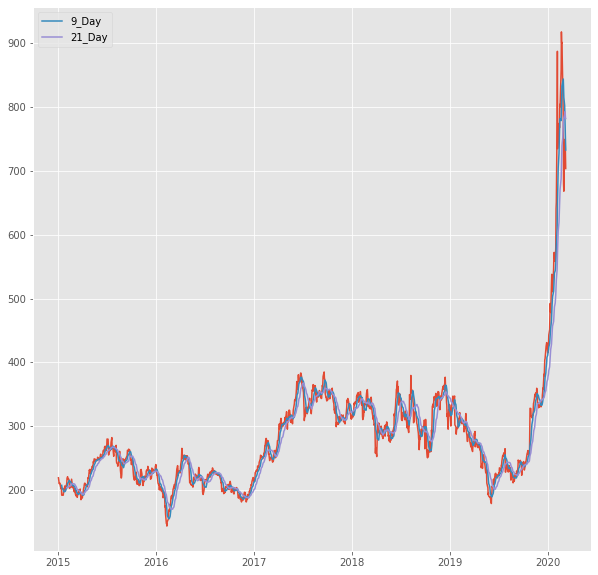

In [24]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10,10))
    plt.plot(df.Close)
    plt.plot(df['9day'], label='9_Day')
    plt.plot(df['21day'], label='21_Day')
    plt.legend(loc=2)
    plt.show

In [25]:
df['position']=np.where(df['9day']>df['21day'],1,0)
df['position']=np.where(df['9day']<df['21day'],-1,df['position'])
df.tail()

,Close,9day,21day,Change,position
Date,,,,,
2020-03-02,743.619995,802.326653,787.889523,0.107257,1
2020-03-03,745.510010,783.225545,792.410476,0.002538,-1
2020-03-04,749.500000,766.568882,790.958095,0.005338,-1
2020-03-05,724.539978,746.962212,783.219046,-0.033869,-1
2020-03-06,703.479980,732.483324,781.732378,-0.029498,-1


In [26]:
df['system']=df['position']*df['Change']
df

,Close,9day,21day,Change,position,system
Date,,,,,,
2015-01-02,219.309998,NaN,NaN,NaN,0,NaN
2015-01-05,210.089996,NaN,NaN,-0.042950,0,-0.000000
2015-01-06,211.279999,NaN,NaN,0.005648,0,0.000000
2015-01-07,210.949997,NaN,NaN,-0.001563,0,-0.000000
2015-01-08,210.619995,NaN,NaN,-0.001566,0,-0.000000
...,...,...,...,...,...,...
2020-03-02,743.619995,802.326653,787.889523,0.107257,1,0.107257
2020-03-03,745.510010,783.225545,792.410476,0.002538,-1,-0.002538
2020-03-04,749.500000,766.568882,790.958095,0.005338,-1,-0.005338


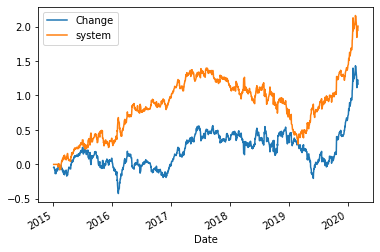

In [27]:
df[['Change','system']].cumsum().plot()

# Valuing Securities with Pricing Models

In [28]:
import numpy as np 
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
aapl=pdr.get_data_yahoo('AAPL','2015-01-01')
aapl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,100.216454
2015-01-05,108.650002,105.410004,108.290001,106.250000,64285500.0,97.393181
2015-01-06,107.430000,104.629997,106.540001,106.260002,65797100.0,97.402374
2015-01-07,108.199997,106.699997,107.199997,107.750000,40105900.0,98.768150
2015-01-08,112.150002,108.699997,109.230003,111.889999,59364500.0,102.563072
...,...,...,...,...,...,...
2020-03-02,301.440002,277.720001,282.279999,298.809998,85349300.0,298.809998
2020-03-03,304.000000,285.799988,303.670013,289.320007,79868900.0,289.320007
2020-03-04,303.399994,293.130005,296.440002,302.739990,54794600.0,302.739990


In [30]:
# EXPECTED RETURN OF AAPL

div = 2.92
pO=152.60
p1=178.71
er=(div+p1)/pO
print('Expected_Return {}'.format(er-1))
print('')
pv=(div+p1)/er
print('Current_Value:{}'.format(pv))

Expected_Return 0.19023591087811265

Current_Value:152.6


In [31]:
# DIVIDEND DISCOUNT MODEL

g=0.08
er=0.12
p1=81
div=3.0

horizon=pd.DataFrame({'div':np.zeros(3), 'exp_price':np.zeros(3)})
horizon.index=np.arange(1,len(horizon)+1)
horizon.index.name='Year'

for year in range(1,horizon['div'].count()+1):
    if year ==1:
        horizon['div'][year]=div
        horizon['exp_price'][year]=p1
    else:
        horizon['div'][year]=div*(1+g)**(year-1)
        horizon['exp_price'][year]=p1*(1+g)**(year-1)
        

In [32]:
horizon

,div,exp_price
Year,,
1,3.0000,81.0000
2,3.2400,87.4800
3,3.4992,94.4784


In [33]:
(horizon['div'][1]+horizon['exp_price'][1])/(1+er)

74.99999999999999

In [34]:
horizon['div'][1]/(1+er)+(horizon['div'][2]+horizon['exp_price'][2])/(1+er)**2

74.99999999999999

In [35]:
# CONSTANT GROWTH MODEL

div=3
g=0.08
er=0.12

div/(er-g)

75.00000000000001

In [36]:
# WHAT ABOUT STOCKS WITH NO DIVIDENDS?

eps=5.6
pe=15.0
er=0.12

eps*pe/(1+er)

74.99999999999999

In [37]:
ea=5.30

ea*pe/(1.0+er)

70.98214285714285

## Finding Correlations Between Securities

In [38]:
import numpy as np 
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
stocks='FB AMZN NFLX GOOG GLD'.split()
data=pdr.get_data_yahoo(stocks,'2014-01-01')['Close']
data=data.resample('BM').last()

C:\Users\gordo\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\pandas_datareader\base.py:270: SymbolWarning:

Failed to read symbol: 'NFLX', replacing with NaN.



In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75 entries, 2014-01-31 to 2020-03-31
Freq: BM
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      75 non-null     float64
 1   AMZN    75 non-null     float64
 2   GOOG    75 non-null     float64
 3   GLD     75 non-null     float64
 4   NFLX    0 non-null      float64
dtypes: float64(5)
memory usage: 3.5 KB


In [41]:
data=data[:60]
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2014-01-31 to 2018-12-31
Freq: BM
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      60 non-null     float64
 1   AMZN    60 non-null     float64
 2   GOOG    60 non-null     float64
 3   GLD     60 non-null     float64
 4   NFLX    0 non-null      float64
dtypes: float64(5)
memory usage: 2.8 KB


In [42]:
change=pd.DataFrame()

for month in data:
    if month not in change:
        change[month]=np.log(data[month]).diff()
change.head()

,FB,AMZN,GOOG,GLD,NFLX
Date,,,,,
2014-01-31,NaN,NaN,NaN,NaN,NaN
2014-02-28,0.089964,0.009462,0.028943,0.060816,NaN
2014-03-31,-0.127913,-0.073709,-0.086376,-0.031926,NaN
2014-04-30,-0.007665,-0.100756,-0.055956,0.004923,NaN
2014-05-30,0.057214,0.027309,0.061185,-0.030986,NaN


In [43]:
change.corr()

,FB,AMZN,GOOG,GLD,NFLX
FB,1.000000,0.429630,0.554500,0.050438,NaN
AMZN,0.429630,1.000000,0.674283,-0.066129,NaN
GOOG,0.554500,0.674283,1.000000,-0.179296,NaN
GLD,0.050438,-0.066129,-0.179296,1.000000,NaN
NFLX,NaN,NaN,NaN,NaN,NaN


In [44]:
corr=change.corr()
corr['FB'].sort_values(ascending=False)

FB      1.000000
GOOG    0.554500
AMZN    0.429630
GLD     0.050438
NFLX         NaN
Name: FB, dtype: float64

ValueError: zero-size array to reduction operation minimum which has no identity

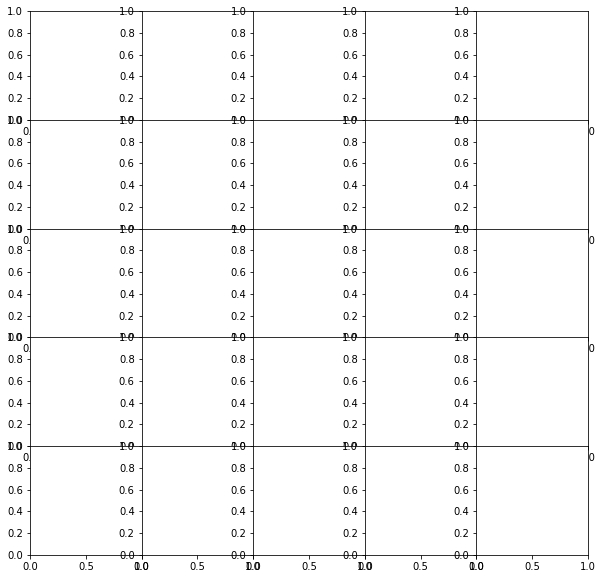

In [45]:
pd.plotting.scatter_matrix(change, diagonal='kde',figsize=(10,10))

## Linear Regression


In [46]:
import numpy as np 
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
housing=pd.read_csv(r'C:/Users/gordo/Programming/Education/Packt/Hands-on-P_4_F/Section 5/housing.csv')
housing.head()

,Price (00s),SqFt,Age,Features,Cust,Corner,Tax
0,902.0,1140,59,3,0,1,1066.00
1,909.0,1069,30,3,0,0,1056.26
2,1121.0,1280,41,1,0,0,1303.00
3,1229.0,1210,38,6,1,0,1109.00
4,1280.0,1050,31,2,0,1,1203.00


In [48]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price (00s)  148 non-null    float64
 1   SqFt         148 non-null    int64  
 2   Age          148 non-null    int64  
 3   Features     148 non-null    int64  
 4   Cust         148 non-null    int64  
 5   Corner       148 non-null    int64  
 6   Tax          140 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 8.2 KB


In [49]:
housing.dropna(inplace=True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 147
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price (00s)  140 non-null    float64
 1   SqFt         140 non-null    int64  
 2   Age          140 non-null    int64  
 3   Features     140 non-null    int64  
 4   Cust         140 non-null    int64  
 5   Corner       140 non-null    int64  
 6   Tax          140 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 8.8 KB


In [50]:
housing[['Price (00s)','SqFt']].corr()

,Price (00s),SqFt
Price (00s),1.000000,0.920079
SqFt,0.920079,1.000000


In [51]:
from sklearn.linear_model import LinearRegression as lr

model=lr(fit_intercept=True)

price=np.array(housing['Price (00s)'])

sqft=np.array(housing['SqFt'])

model.fit(sqft[:,np.newaxis],price)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

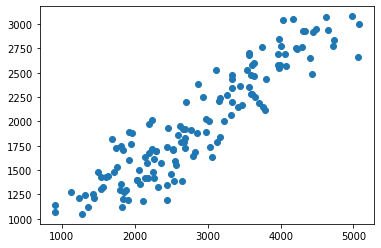

In [52]:
plt.scatter(housing['Price (00s)'],housing['SqFt'])

Text(0.5, 0, 'Sqft')

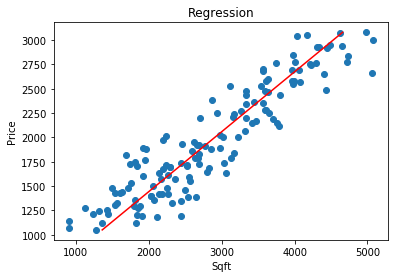

In [53]:
xfit=np.linspace(sqft.min(),sqft.max(),100)
yfit=model.predict(xfit[:,np.newaxis])

plt.scatter(price,sqft)
plt.plot(yfit,xfit,c='r')

plt.title('Regression')
plt.ylabel('Price')
plt.xlabel('Sqft')

# Time Series Analysis and Forecasting

In [54]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import datetime as datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df1=pdr.DataReader('WMT',data_source='yahoo',start='2012-1-3')

df1.to_csv(r'C:/Users/gordo/Programming/Data_Bank/PACKT/one.csv')

df = pd.read_csv(r'C:/Users/gordo/Programming/Data_Bank/PACKT/one.csv')

df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,61.060001,59.869999,59.970001,60.330002,12668800.0,49.472050
1,2012-01-04,60.349998,59.470001,60.209999,59.709999,9593300.0,48.963642
2,2012-01-05,59.619999,58.369999,59.349998,59.419998,12768200.0,48.725822
3,2012-01-06,59.450001,58.869999,59.419998,59.000000,8069400.0,48.381420
4,2012-01-09,59.549999,58.919998,59.029999,59.180000,6679300.0,48.529022
...,...,...,...,...,...,...,...
2052,2020-03-02,116.400002,107.290001,107.599998,115.879997,17074200.0,115.879997
2053,2020-03-03,117.529999,112.339996,116.080002,112.910004,11113600.0,112.910004
2054,2020-03-04,116.839996,113.470001,114.239998,116.769997,8208400.0,116.769997
2055,2020-03-05,117.250000,113.910004,114.400002,115.919998,8546100.0,115.919998


In [56]:
df['Date1']=df['Date']
df.set_index('Date1')

,Date,High,Low,Open,Close,Volume,Adj Close
Date1,,,,,,,
2012-01-03,2012-01-03,61.060001,59.869999,59.970001,60.330002,12668800.0,49.472050
2012-01-04,2012-01-04,60.349998,59.470001,60.209999,59.709999,9593300.0,48.963642
2012-01-05,2012-01-05,59.619999,58.369999,59.349998,59.419998,12768200.0,48.725822
2012-01-06,2012-01-06,59.450001,58.869999,59.419998,59.000000,8069400.0,48.381420
2012-01-09,2012-01-09,59.549999,58.919998,59.029999,59.180000,6679300.0,48.529022
...,...,...,...,...,...,...,...
2020-03-02,2020-03-02,116.400002,107.290001,107.599998,115.879997,17074200.0,115.879997
2020-03-03,2020-03-03,117.529999,112.339996,116.080002,112.910004,11113600.0,112.910004
2020-03-04,2020-03-04,116.839996,113.470001,114.239998,116.769997,8208400.0,116.769997


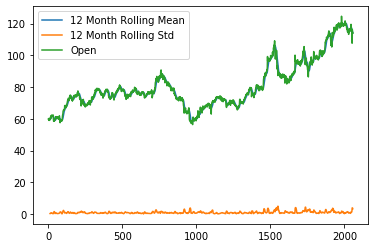

In [57]:
timeseries = df['Open']

timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

The next step is to use the ETS decomposition method to visualize the general trend of the data, as we discussed in the earlier section:

<Figure size 432x288 with 0 Axes>

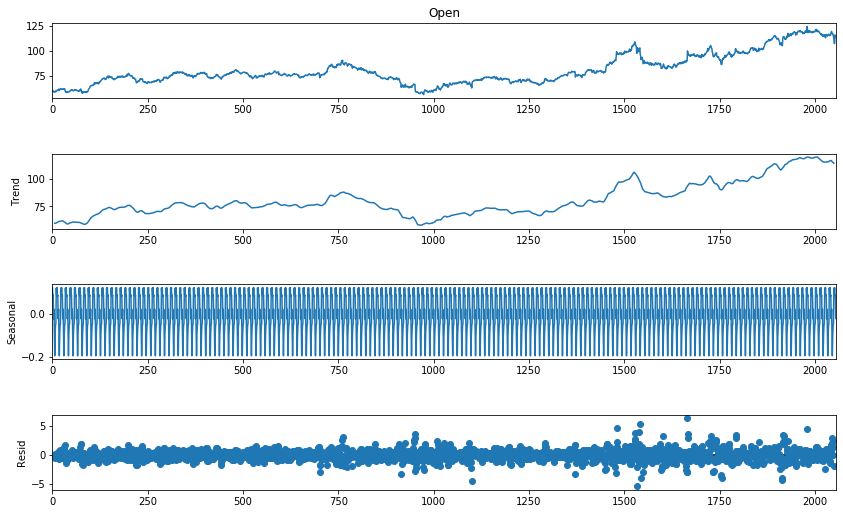

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Open'], period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(13, 8)

From the ETS decomposition, we can see that the Walmart stock prices follow a seasonal pattern and that there are both uptrends and downtrends in the trending pattern. The next step is to find out whether the dataset is stationary. To do this, we will define a method to check whether the time series data is stationary using the Dickey Fuller library, which is called adfuller. This is present in the statsmodels library. Based on the p value that's returned, we will decide whether the data is stationary or not. First, we will import the adfuller library or class and create a method, as shown in the following code segment:

In [59]:
from statsmodels.tsa.stattools import adfuller

# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [60]:
adf_check(df['Open'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.7958128485183927
p-value : 0.8203489185351809
#Lags Used : 6
Number of Observations Used : 2050
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


From the preceding output, we can see that the value of p is larger than 0.05, so we decide that the data is not stationary. To make the data stationary, we will follow the differencing technique, which we have already discussed. In differencing, the first difference of a time series is the series of changes from one period to the next. We take away this change by using a shift operation, which we can do easily with pandas. We can continue to take away the second difference, the third difference, and so on, until the data is stationary. We can do this easily with pandas. You can continue to take the second difference, third difference, and so on, until your data is stationary

In [61]:
df['Open First Difference'] = df['Open'] - df['Open'].shift(1)

df['Open First Difference'].head()

0         NaN
1    0.239998
2   -0.860001
3    0.070000
4   -0.389999
Name: Open First Difference, dtype: float64

After the first differencing, we will pass the new dataset column, Open First Difference, to the same method of the Dickey Fuller Test to see whether the data is stationary

In [62]:
adf_check(df['Open First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -16.994378506732073
p-value : 8.821517470298779e-30
#Lags Used : 7
Number of Observations Used : 2048
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


As you can see in the preceding output, we are now getting a p value that is much less than 0.05, so we can now consider the dataset as stationary. We then set the differencing (d) value in the Arima (p,d,q) model as one, as we have only observed one difference to establish whether the data is stationary.

If we try to plot the Open First Difference, we will see the stationary pattern, as shown here:

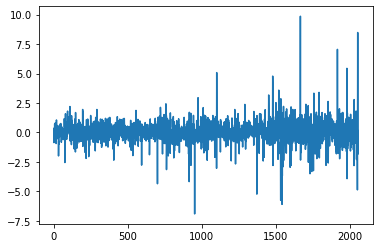

In [63]:
df['Open First Difference'].plot()

So far, we have found out the value of d in the ARIMA (p,d,q) model, which is the number of times we have to carry out the differencing. We now need to find the values of p and q, which are the lags for the AR and the MA models.

To find the p and q parameters, we will be using ACF and PACF.

## Autocorrelation function 
An autocorrelation plot (also known as a correlogram) shows the correlation of the series with itself, lagged by x time units. The y axis is the correlation, while the x axis is the number of time units of the lag.

Imagine taking a time series of length T, copying it, and deleting the first observation of copy #1 and the last observation of copy #2. Now, you have two series of length T−1, for which you calculate a correlation coefficient. This is the value of the vertical axis at x=1 in your plots. It represents the correlation of the series lagged by one time unit. You go on and do this for all possible time lags x, and this defines the plot.

Autocorrelation interpretation

The actual interpretation of an autocorrelation plot and how it relates to ARIMA models can get a bit complicated, but there are some basic common methods we can use. Our main priority here is to try and figure out whether we will use the AR, MA, or both components of the ARIMA model, as well as how many lags we should use. In general, you would use either AR or MA; using both is less common.

## Partial autocorrelation (PACF)
In general, a partial correlation is a conditional correlation. It is the correlation between two variables under the assumption that we know and take into account the values of another set of variables. For instance, consider a regression context in which y is the response variable and x1, x2, and x3 are predictor variables. The partial correlation between y and x3 is the correlation between the variables that specifies how both y and x3 are related to x1 and x2.

Formally, this relationship is defined as follows:

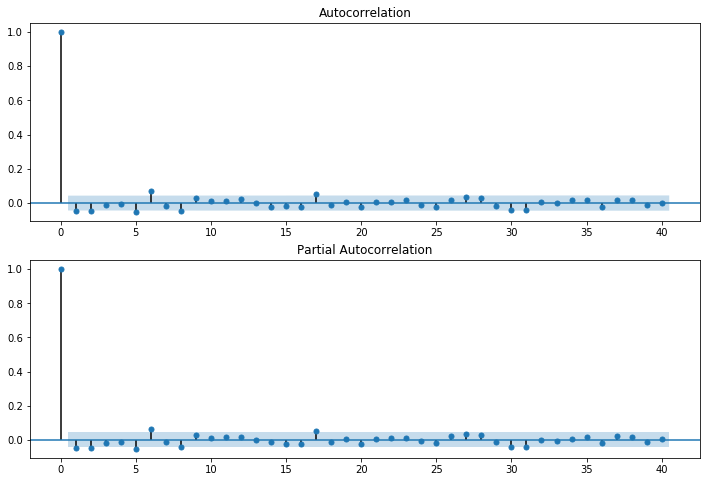

In [64]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Open First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Open First Difference'].iloc[13:], lags=40, ax=ax2)

In [65]:
from statsmodels.tsa.arima_model import ARIMA
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes
 |  -----
 |

In [66]:
model = sm.tsa.statespace.SARIMAX(df['Open'],order=(0,1,0), seasonal_order=(0,1,0,12))             
results = model.fit()          
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Open   No. Observations:                 2057
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -3480.853
Date:                            Fri, 06 Mar 2020   AIC                           6963.706
Time:                                    19:38:53   BIC                           6969.329
Sample:                                         0   HQIC                          6965.769
                                           - 2057                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.7648      0.026     68.610      0.000       1.714       1.815
Ljung-Box (Q):                     

Text(0.5, 0, 'Date')

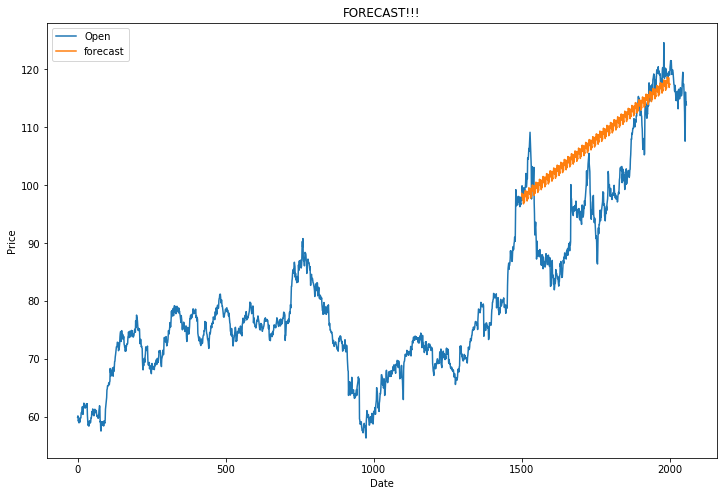

In [67]:
df['forecast'] = results.predict(start = 1500, end= 2000, dynamic= True) 
df[['Open','forecast']].plot(figsize=(12,8))

plt.title('FORECAST!!!')
plt.ylabel('Price')
plt.xlabel('Date')



# Here it is

In [69]:
import bs4 as bs
import requests
import yfinance as yf
import datetime

resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2020,3,5)
data = yf.download(tickers, start=start, end=end)


data=pd.DataFrame(data['Adj Close'])
data

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,...,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,65.134018,31.963160,157.679230,155.214005,82.120384,72.719398,309.959991,68.076973,138.303879,224.570007,83.732750,39.252548,127.517586,151.568893,128.960007,61.911411,70.182968,13.631915,44.346638,132.793976,38.630932,40.735397,87.767433,70.188278,59.009998,...,37.080246,65.252937,63.800819,44.651684,103.390709,147.645950,86.700180,21.122946,91.487152,47.479309,36.635494,16.521799,20.187424,100.250526,46.941418,85.283569,65.563515,37.627628,19.535194,65.474289,89.536743,101.532249,156.240005,40.154263,83.823868
2019-01-03,62.734497,29.581665,162.601715,139.753540,79.414642,71.664497,302.290009,64.864136,133.581940,215.699997,78.674881,39.080009,123.666794,147.735291,121.849998,62.067333,70.019386,13.622300,43.226284,132.979675,37.782650,41.091290,86.364716,68.870239,57.700001,...,34.550728,65.426735,64.976517,44.299721,103.045822,144.548599,86.465637,21.301956,91.016685,46.692577,36.013756,16.261539,20.871902,99.280663,46.756454,82.072556,64.556870,37.647484,19.108196,63.229786,87.284607,99.695786,146.880005,39.932148,80.926529
2019-01-04,64.905960,31.530161,158.567856,145.719513,81.973129,72.494736,313.440002,66.715439,138.776093,226.190002,80.584984,39.981045,128.595444,157.733887,128.279999,62.944401,70.664062,14.074135,43.762100,139.332047,39.176952,41.235569,88.108376,70.608101,59.380001,...,36.014168,65.909515,64.739479,45.612450,108.085068,148.454803,88.762138,22.187574,91.585175,47.413754,37.568104,16.473604,21.584513,103.284927,47.213993,85.872749,66.937065,38.739868,19.845737,65.897575,89.556320,103.100700,152.970001,41.158604,84.101685
2019-01-07,66.284187,32.425678,160.894318,145.395203,83.169548,73.012421,314.799988,67.714539,139.258118,229.259995,81.091736,40.182339,127.899734,157.724121,132.720001,62.223259,70.269562,14.141429,43.995918,139.205017,39.401211,41.264431,88.459061,70.403076,61.240002,...,37.293465,65.610184,65.507477,45.317558,111.236992,149.549713,88.977127,22.752861,92.663338,47.551426,37.634045,16.425406,22.015827,105.119019,47.009563,88.141090,67.285156,39.435020,20.272734,64.922997,89.458405,103.140411,155.289993,41.322777,84.607712
2019-01-08,67.255898,31.904110,159.776016,148.166870,83.556091,73.793823,318.420013,66.901543,142.779892,232.679993,83.070061,40.930004,128.654221,160.465195,133.869995,63.207531,71.135544,14.468287,44.132305,142.293243,39.557220,42.399445,88.566216,70.715500,62.450001,...,36.934872,66.286087,66.664223,45.222435,113.737450,150.506546,90.237755,23.431208,93.310226,47.203953,37.530422,16.454325,22.147100,108.412689,47.554714,86.461929,67.774361,39.166885,20.942348,65.533348,89.282150,100.827438,156.330002,41.699402,85.867859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-28,77.070000,19.049999,132.979996,273.359985,85.709999,84.320000,150.259995,77.029999,180.589996,345.119995,109.050003,37.650002,154.740005,85.879997,190.880005,79.000000,89.260002,16.730000,42.849998,190.669998,42.160000,47.840000,120.589996,97.076942,86.510002,...,55.560001,92.330002,74.820000,40.849998,127.860001,189.250000,110.307945,19.049999,107.680000,67.139999,33.250000,22.389999,25.668423,107.980003,62.320000,83.489998,51.439999,49.240002,32.200001,77.339996,89.250000,136.149994,210.970001,39.950001,133.229996
2020-03-02,81.970001,18.860001,132.990005,298.809998,88.690002,87.160004,155.100006,81.610001,189.550003,360.279999,111.269997,38.840000,163.000000,86.070000,190.830002,84.419998,95.089996,18.219999,45.290001,193.839996,42.849998,49.490002,127.889999,103.071442,90.910004,...,60.040001,97.690002,75.260002,42.259998,133.869995,199.539993,116.49977

## Calculating the risk of a security in Python
In this section, we will look at how to calculate a security risk. We will using the Adjusted Close column of MSFT and AAPL and we will use the variance and standard variance. First, we will import the same libraries:

In [ ]:
data_returns = np.log(data/data.shift(1))
#data_returns

In [ ]:
nom_ror = pd.DataFrame(data/data.iloc[0])
nom_ror.tail(1)

#Nominal_RoR=pd.DataFrame(nom_ror.tail(1))
#Nominal_RoR

In [ ]:
REPORT=pd.DataFrame()




REPORT['Mean_D']=data_returns.mean()
REPORT['Mean_A']=data_returns.mean()*250
REPORT['Std_D']=data_returns.std()
REPORT['Std_A']=data_returns.std()*250**0.5
REPORT['Var_D']=data_returns.var()
REPORT['Var_A']=data_returns.var()*250


#REPORT['Normalize Return'] = Nominal_RoR


REPORT

In [ ]:
rol_m_9=pd.DataFrame(data.rolling(9).mean())
rol_m_21=pd.DataFrame(data.rolling(21).mean())


In [ ]:
cov_matrix = data_.cov()
cov_matrix